In [38]:
'''
Title -->       10 Object Recognition using ResNet50 

Definition -->  In our project we have used a image sample of 50,000 in which we used  40,000 as train data and 10,000
                as test data then we used basic keras sequential model to test predict out test data,
                but we did not get accuracy much. so used Resnet-50 a cnn model which first we trained with a huge 
                database of image called imagenet then we used our dataset CIFR-10 to train that pre-trained model
                to detect image eventually we got much improved accuracy.  

Members         Mukesh Patel      M210705CA         mukesh_m210705ca@nitc.ac.in
                Prakash Singh     M210677CA         prakash_m210677ca@nitc.ac.in

Submition Date->27 April 2023
  '''

'\nTitle -->       10 Object Recognition using ResNet50 \n\nDefinition -->  In our project we have used a image sample of 50,000 in which we used  40,000 as train data and 10,000\n                as test data then we used basic keras sequential model to test predict out test data,\n                but we did not get accuracy much. so used Resnet-50 a cnn model which first we trained with a huge \n                database of image called imagenet then we used our dataset CIFR-10 to train that pre-trained model\n                to detect image eventually we got much improved accuracy.  \n\nMembers         Mukesh Patel      M210705CA         mukesh_m210705ca@nitc.ac.in\n                Prakash Singh     M210677CA         prakash_m210677ca@nitc.ac.in\n\nSubmition Date->27 April 2023\n  '

In [39]:
# installing Kaggle to download data
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:

# configuring the path of Kaggle.json file 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [41]:

# Dataset API to load dataset from kaggle
!kaggle competitions download -c cifar-10


cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
# to check dataset that downloaded
!ls   
  

cifar-10.zip  kaggle.json  sampleSubmission.csv  train	   trainLabels.csv
drive	      sample_data  test.7z		 train.7z


In [43]:

# Extracting the dataset from downloaded  zip dataset "cifar-10.zip"
from zipfile import ZipFile

# Loading dataset containing test and train dataset in zip
dataset = "/content/cifar-10.zip"
with ZipFile(dataset, 'r') as zip:

# Extracting data from zip file
    zip.extractall()
    print("Dataset is extracted")

Dataset is extracted


In [44]:

# Here we can see that all extracted file from zip
!ls


cifar-10.zip  kaggle.json  sampleSubmission.csv  train	   trainLabels.csv
drive	      sample_data  test.7z		 train.7z


In [45]:

# Downloading py7zr extracting libraries to extract py7zr type files.
!pip install py7zr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
# importing py7zr to unzip train and test dataset from 7z type file.
import py7zr

# Loading train dataset in archive_train
archive = py7zr.SevenZipFile("/content/train.7z", mode = 'r')
archive.extractall()    # Extracting all file from training zip file.
archive.close()


In [47]:
# we can now have extracted train and test dataset file
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train	   trainLabels.csv
drive	      sample_data  test.7z		 train.7z


In [48]:
# importing some libraries 

#  os is used for creating and removing a directory (folder),
# fetching its contents, changing and identifying the current directory
import os

# numpy adds support for large, multi-dimensional arrays and matrices
import numpy as np

# pandas used for working with data sets
import pandas as pd

# PIL stands for Python Image Library used to deal with image
from PIL import Image

# Matplotlib for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt
# mpimg deal with image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [49]:

# Loading test dataset

# loading train data as list using os module
filenames = os.listdir("/content/train")
 
# To confirm it is in list form 
print(type(filenames))


<class 'list'>


In [50]:

# Checking filenames length
print(len(filenames))


50000


In [51]:

# To check  are not in order 
# Printing top 5 rows of dataset
print(filenames[0:5])

# Printing last 5 rows of dataset
print(filenames[-5:])


['14715.png', '48659.png', '37205.png', '40568.png', '18854.png']
['1697.png', '7626.png', '39684.png', '32866.png', '10013.png']


**Label Processing**

In [52]:
#  labels_df cointain target class of training image dataset
labels_df = pd.read_csv("/content/trainLabels.csv")

# Checking the shape of labels_df
print(labels_df.shape)


(50000, 2)


In [53]:

# Printing first 5 data of labels_df to check data.
print(labels_df.head())


   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile


In [54]:

# just checking train image data and labels data are matching
print(labels_df[labels_df['id']==44493])


          id label
44492  44493  frog


In [55]:

# labels_df contain data in order
# Printing first 10 rows of labels_df
print(labels_df.head(10))


   id       label
0   1        frog
1   2       truck
2   3       truck
3   4        deer
4   5  automobile
5   6  automobile
6   7        bird
7   8       horse
8   9        ship
9  10         cat


In [56]:

# printing last 10 rows of labels_df
print(labels_df.tail(10))


          id       label
49990  49991        deer
49991  49992        bird
49992  49993    airplane
49993  49994  automobile
49994  49995    airplane
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile


In [57]:
# Printing the no. of intance of each object
print(labels_df['label'].value_counts())


frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64


In [58]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]


In [59]:
# Printing after encoding
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


        id label
7795  7796  frog


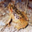

In [60]:
# displaying sample image frog
import cv2
from google.colab.patches import cv2_imshow
# After given path of file train we need to put the name of image which we want to show
img = cv2.imread('/content/train/7796.png')
# Here we are showing the image of frog.
print(labels_df[labels_df['id']== 7796])
# A fn two show image
cv2_imshow(img)

          id label
45887  45888   dog


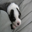

In [61]:
# displaying sample image of dog
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
print(labels_df[labels_df['id']== 45888])
cv2_imshow(img)

In [62]:
# creating a list contains id of each intances
id_list = list(labels_df['id'])
print("Lnegth of id_list_train",len(id_list))
print(id_list[0:5])
print(id_list[-5:])


Lnegth of id_list_train 50000
[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [63]:
# Image processing
# Loading the train dataset
data_folder = '/content/train/'

# to convert images to numpy arrays
data = []

for id in id_list:
    # eg. image = /content/train/001.png or /content/train/002.png, etc
    image = Image.open(data_folder + str(id) + '.png')
  
    #converting image to numpy array type
    image = np.array(image)
    # And then appending to list data
    data.append(image)


In [64]:
# print data type of variable data
print(type(data))
# Printing length of data
print("length of train_data list ", len(data))


<class 'list'>
length of train_data list  50000


In [65]:
# Printing type of element store in list data
print(type(data[0]))
# Printing shape of each element ie. image type
print("Size of each image store as ndarray in data",data[0].shape)
# i.e. (32, 32, 3) here 32 is width and length in pixel and 3 denotes color RGB


<class 'numpy.ndarray'>
Size of each image store as ndarray in data (32, 32, 3)


In [66]:
# Printing the image in pixel matrix form
print(data[0])


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [67]:
# convert image list and label list to numpy arrays

X = np.array(data) # converting list of image into numpy array
Y = np.array(labels) # convering our labels list into numpy array


**Train Test Split**

In [68]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [69]:
# printing type and shape of X that contains our image
print("Type of x", type(X))
print("Shape of X ", X.shape)

# Printing type and shape of y
print("Type of Y", type(Y_train))
print("Shape of Y ", Y_train.shape)


print("Type of x_test", type(X_test))
print("Shape of X_test ", X_test.shape)

# Printing type and shape of y
print("Type of Y_test", type(Y_test))
print("Shape of Y_test ", Y_test.shape)

Type of x <class 'numpy.ndarray'>
Shape of X  (50000, 32, 32, 3)
Type of Y <class 'numpy.ndarray'>
Shape of Y  (40000,)
Type of x_test <class 'numpy.ndarray'>
Shape of X_test  (10000, 32, 32, 3)
Type of Y_test <class 'numpy.ndarray'>
Shape of Y_test  (10000,)


In [70]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255
# now the pixels will be in range 0-1 istead of 0-256

# printing X_train and X_test
print(X_train_scaled)


[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

**Building Neural Network**

In [71]:
# importing libraries
import tensorflow as tf
# Keras is also used for distributed training of deep learning models
from tensorflow import keras

In [72]:
num_of_classes = 10

# setting up the layers of Neural Network
# A Sequential model is appropriate for a plain stack of 
# layers where each layer has exactly one input tensor and one output tensor

# provides inbuilt modules for all neural network computations
model = keras.Sequential([
    
    # keras.flatten converts the multi-dimensional arrays into 
    # flattened one-dimensional arrays or single-dimensional arrays
    keras.layers.Flatten(input_shape=(32,32,3)),  # Input Layer
    
# Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves
# Relu remove every negative value from the filtered image and replace it with zero.
    keras.layers.Dense(128, activation='relu'),   # Hidden Layer

# The softmax function is used as the activation function in the output layer of 
# neural network models that predict a multinomial probability distribution.
    keras.layers.Dense(num_of_classes, activation='softmax')    # Output Layer
])

In [73]:
# compile the neural network

# compilation is a step that transforms the simple sequence of layers 
# that we previously defined into a highly efficient series of matrix transformations

# Optimizer it helps in reducing the overall loss and improving accuracy.

# Adam optimization is a stochastic gradient descent method that is based on 
# adaptive estimation of first-order and second-order moments.

# sparse_categarical_cross. when each sample belongs exactly to one 
# categorical crossentropy when one sample can have multiple classes or labels are 

# soft probabilities (like [0.5, 0.3, 0.2]).
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [74]:
# training the neural network

# validation_split is Fraction of the training data to be used as validation data
# Epoch is the total number of iterations of the training data in one cycle
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 3ms/step - loss: 1.9635 - acc: 0.2928 - val_loss: 1.8701 - val_acc: 0.3133
Epoch 2/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.8078 - acc: 0.3544 - val_loss: 1.7806 - val_acc: 0.3565
Epoch 3/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.7570 - acc: 0.3744 - val_loss: 1.7897 - val_acc: 0.3607
Epoch 4/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.7302 - acc: 0.3809 - val_loss: 1.6856 - val_acc: 0.3915
Epoch 5/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.7117 - acc: 0.3901 - val_loss: 1.7028 - val_acc: 0.3808
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6956 - acc: 0.3991 - val_loss: 1.6820 - val_acc: 0.3930
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6835 - acc: 0.3990 - val_loss: 1.7306 - val_acc: 0.3815
Epoch 8/10
1125/1125 [==============================] - 4s 3ms

**ResNet-50**

In [75]:
# ResNet-50
# importing libraries to use one of cnn model ResNet-50 to predict image 

from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50 # the ccn model we will use 
from tensorflow.keras import optimizers

In [76]:
# parameter -1
# The ImageNet project is a large visual database designed for use in visual object recognition software research.
# More than 14 million images have been hand-annotated by the project to indicate what 
# objects are pictured and in at least one million of the images, bounding boxes are also provided.

# parameter -2
# include_top = false means in imagenet we have thousand of class but need only 10, so we use own output layer
# in imagenet out class of image is also included.

#parameter -3
# input_shape the pixel of input image imagenet have image in that dimension on e.g (256,256,3)
# but our image dimension is (32,32,3).
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary() # this show the different layer the model have.

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [77]:
# Building our model
num_of_classes = 10 # No of classes of images

model = models.Sequential() # we will stack all our layer in model

# Since our image is of length and width(32,32) our resnet-50 could only take of (256,256)
# We need to upscale out image dimension, so we need to upscale three times each time it doubles it dimension

# first upscaling it will increase the dimension of image to (64,64)
model.add(layers.UpSampling2D((2,2)))

# Second upscaling it will increase the dimension of image to (128,128)
model.add(layers.UpSampling2D((2,2)))

# Third upscaling it will increase the dimension of image to (256,256)
model.add(layers.UpSampling2D((2,2)))

# Then we need to add out upscaled image to the nodel
model.add(convolutional_base)

# Again we do flatten , which we have seen ealier 
model.add(layers.Flatten())

# we normalize the values on same scale in the end of each layer
model.add(layers.BatchNormalization())

# 128 Hidden layer with activation relu 
model.add(layers.Dense(128, activation='relu'))

# To handle overfittng we use dropout, it applied to the hidden layers. 
# For instance, if the hidden layers have 1000 neurons (nodes) and a dropout is 
# applied with drop probability = 0.5, then 500 neurons would be randomly dropped in every iteration (batch)
model.add(layers.Dropout(0.5))

# In the end of layer we normalize
model.add(layers.BatchNormalization())
# Again we use hidden layer with 64 neurons 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
# for output layer we use activation fn softmax
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [78]:

# RMSprop optimizer is better than adam
# The gist of RMSprop is to: Maintain a moving (discounted) average of 
# the square of gradients. Divide the gradient by the root of this average.

# lr is learning rate it decides how much change in weight be there in one updation.
# all other parameter we have seen ealier
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [79]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 468s 379ms/step - loss: 1.9827 - acc: 0.2800 - val_loss: 1.7393 - val_acc: 0.3975
Epoch 2/10
1125/1125 [==============================] - 428s 381ms/step - loss: 1.3934 - acc: 0.5027 - val_loss: 2.5215 - val_acc: 0.3467
Epoch 3/10
1125/1125 [==============================] - 429s 381ms/step - loss: 1.1829 - acc: 0.5889 - val_loss: 1.4285 - val_acc: 0.5433
Epoch 4/10
1125/1125 [==============================] - 430s 382ms/step - loss: 1.0509 - acc: 0.6419 - val_loss: 0.8826 - val_acc: 0.6827
Epoch 5/10
1125/1125 [==============================] - 437s 388ms/step - loss: 0.9503 - acc: 0.6821 - val_loss: 0.8765 - val_acc: 0.7010
Epoch 6/10
1125/1125 [==============================] - 437s 388ms/step - loss: 0.8628 - acc: 0.7124 - val_loss: 1.0418 - val_acc: 0.6405
Epoch 7/10
1125/1125 [==============================] - 437s 388ms/step - loss: 0.7883 - acc: 0.7381 - val_loss: 0.9221 - val_acc: 0.6850
Epoch 8/10
1125/1125 [============

In [80]:
# evaluating loss and accuracy on test data
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 38s 115ms/step - loss: 0.7859 - acc: 0.7427
Test Accuracy = 0.7426999807357788


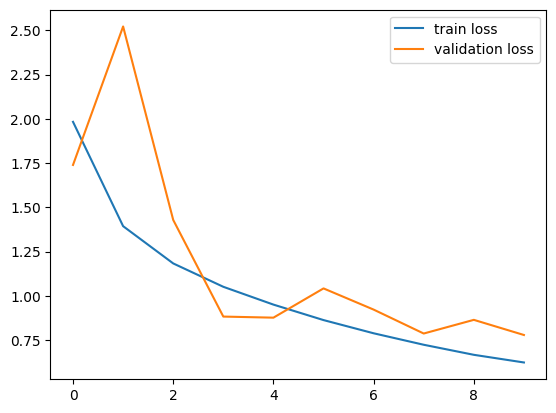

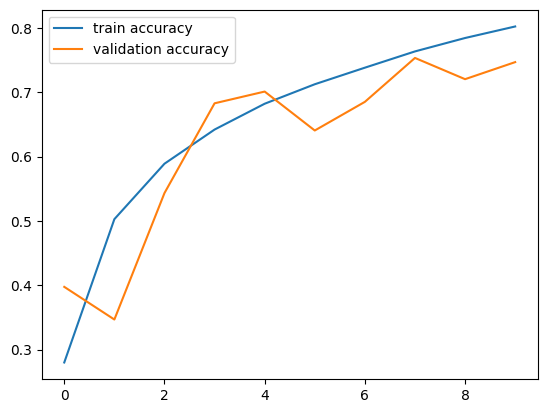

In [81]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()